# **Objective**: Comparison of the various types of gradient descent algorithm and it's effects on reducing loss on training

# Libraries

In [1]:
# importing necessary libraries
import sys
import numpy as np
import pandas as pd
# machine/deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
# data visualisation
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline

import keras
#tf.compat.v1.enable_eager_execution()
#tf.config.run_functions_eagerly(True)

# data preprocessing
from keras.utils import to_categorical

# Data
from keras.datasets import cifar10

# Data



*   Download CIFAR-10 data
*   The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
*   The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
*   There are 6,000 images of each class.



---


*   Load Dataset
*   Perform one-hot encoding (10 categories)
*   Normalise the pixel values and rescale them to 0-1







In [2]:
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

# data normalisation
data_train, data_test = data_train / 255.0, data_test / 255.0

# convert labels to one-hot encoding
label_train = to_categorical(label_train, num_classes=10)
label_test = to_categorical(label_test, num_classes=10)

# data structure shape
print(data_train.shape)
print(label_train.shape)
print(data_test.shape)
print(label_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


## Sample Plot of Images

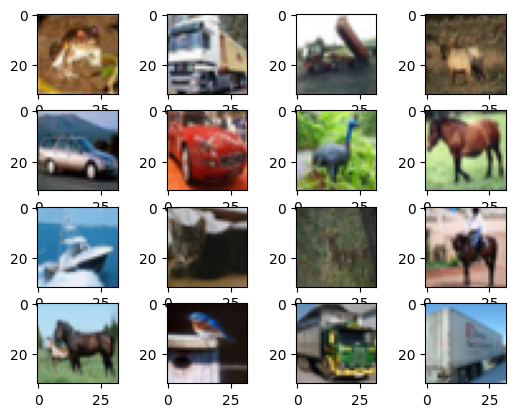

In [3]:
# plot first few images
for i in range(16):
 # define subplot
 plt.subplot(4, 4, i + 1)
 # plot raw pixel data
 plt.imshow(data_train[i])

# show the figure
plt.show()

# Parameters

In [4]:
n_epochs = 50
minibatch_size = 64
num_batches = 50 # use only first 50 mini-batches for each epoch
eta = 0.001 # learning rate

optimizers_dict = {
    "SGD": optimizers.SGD(learning_rate=eta),
    "AdaGrad": optimizers.Adagrad(learning_rate=eta),
    "RMSProp": optimizers.RMSprop(learning_rate=eta),
    "Nesterov": optimizers.SGD(learning_rate=eta, momentum=0.9, nesterov=True),
    "Adam": optimizers.Adam(learning_rate=eta),
    "AdamW": optimizers.AdamW(learning_rate=eta, weight_decay=0.01)
}

# Optimizer Algorithms

---

### **1. Stochastic Gradient Descent (SGD)**

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \nabla \mathcal{L}(\mathbf{w}_t)
$$

---

### **2. AdaGrad**

-  Adaptive Gradient learning rate suppress updates for highly variable gradients and enhance the updates for less variable gradients

$$
\mathbf{Q}_t = \sum_{s=1}^t \nabla \mathcal{L}(\mathbf{w}_s) \nabla \mathcal{L}(\mathbf{w}_s)^\top
$$

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \text{diag}(\mathbf{Q}_t)^{-\frac{1}{2}} \nabla \mathcal{L}(\mathbf{w}_t)
$$

---

### **3. RMSProp**

-  Similar to AdaGrad, but uses an exponential moving average computation

$$
\mathbf{q}_{t+1} = \rho \mathbf{q}_t + (1 - \rho) \nabla \mathcal{L}(\mathbf{w}_t)^2
$$

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \frac{\nabla \mathcal{L}(\mathbf{w}_t)}{\sqrt{\mathbf{q}_{t+1}} + \epsilon}
$$

---

### **4a. Polyak Momentum**

$$
\mathbf{v}_{t+1} = \gamma \mathbf{v}_t - \eta \nabla \mathcal{L}(\mathbf{w}_t)
$$

$$
\mathbf{w}_{t+1} = \mathbf{w}_t + \mathbf{v}_{t+1}
$$

---

### **4b. Nesterov Accelerated Gradient (NAG)**

$$
\mathbf{v}_{t+1} = \mathbf{w}_t - \eta \nabla \mathcal{L}(\mathbf{w}_t)
$$

$$
\gamma_t = \frac{1 - \rho_t}{\rho_{t+1}}, \quad \rho_0 = 0, \quad \rho_{t+1} = \frac{1 + \sqrt{1 + 4\rho_t^2}}{2}
$$

$$
\mathbf{w}_{t+1} = (1 - \gamma_t) \mathbf{v}_{t+1} + \gamma_t \mathbf{v}_t
$$

---

### **5. Adam**

-  Adaptive Moment Estimation (Adam), combines momentum (to smooth updates and speed up convergence) and adaptive learning rates (to scale learning rates based on recent gradient magnitudes)

-  1st Moment: "Running Average" of gradient (analagous to momentum)
-  2nd Moment: "Running Average" of squared gradient analagous to shock absorber)


$$
\tilde{\mathcal{L}}(\mathbf{w}) = \mathcal{L}(\mathbf{w}) + \frac{\lambda}{2} \|\mathbf{w}\|^2
$$

$$
\mathbf{g}_{t+1} = \beta_1 \mathbf{g}_t + (1 - \beta_1) \left( \nabla \mathcal{L}(\mathbf{w}_t) + \lambda \mathbf{w}_t \right)
$$

$$
\mathbf{q}_{t+1} = \beta_2 \mathbf{q}_t + (1 - \beta_2) \left( \nabla \mathcal{L}(\mathbf{w}_t) + \lambda \mathbf{w}_t \right)^2
$$

$$
\hat{\mathbf{g}}_t = \frac{\mathbf{g}_{t+1}}{1 - \beta_1^t}, \quad
\hat{\mathbf{q}}_t = \frac{\mathbf{q}_{t+1}}{1 - \beta_2^t}
$$

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \frac{\hat{\mathbf{g}}_t}{\sqrt{\hat{\mathbf{q}}_t} + \epsilon}
$$

---

### **6. AdamW (Decoupled Weight Decay)**

-  AdamW decouples weight decay from the optimisation step
-  Instead of adding L2 regularisation to the loss, it directly subtracts weight decay during parameter updates, leading to more effective regularisation and better generalisation.

$$
\mathbf{w}_{t+1} = \mathbf{w}_t - \eta \left( \frac{\hat{\mathbf{g}}_t}{\sqrt{\hat{\mathbf{q}}_t} + \epsilon} + \lambda \mathbf{w}_t \right)
$$


# CNN Model Architecture



*   3 Convolutional Layer followed by a fully connected layer of 1000 units
*   Each convolutional layer consists of a sublayer of 5x5 convolutional filters with stride 1
*   Followed by a sublayer of 2x2 max-pool units with stride 2
*   Each neuron applies ReLU activation function


In [5]:
def cnn_model(dropout):
    model = Sequential()
    # 1st Layer
    model.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    # 2nd Layer
    model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    # 3rd Layer
    model.add(Conv2D(128, (5,5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())

    if dropout:
        model.add(Dropout(0.5))

    # Fully connected layer (1000 units)
    model.add(Dense(1000, activation='relu'))

    # Output layer (10 classes for CIFAR-10 since 10 categories)
    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

# Loss Function for the different gradient descent algorithms

In [6]:
# Train model and plot loss
def train_and_evaluate(optimizer_name, dropout=False):
    model = cnn_model(dropout)
    optimizer = optimizers_dict[optimizer_name].__class__(learning_rate=eta)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(data_train, label_train, epochs=n_epochs, batch_size=minibatch_size, steps_per_epoch=num_batches, shuffle=True, verbose=0)
    return history.history['loss']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317,634 (8.84 MB)

 Trainable params: 2,317,634 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317,634 (8.84 MB)

 Trainable params: 2,317,634 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317,634 (8.84 MB)

 Trainable params: 2,317,634 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317,634 (8.84 MB)

 Trainable params: 2,317,634 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317,634 (8.84 MB)

 Trainable params: 2,317,634 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317,634 (8.84 MB)

 Trainable params: 2,317,634 (8.84 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building 

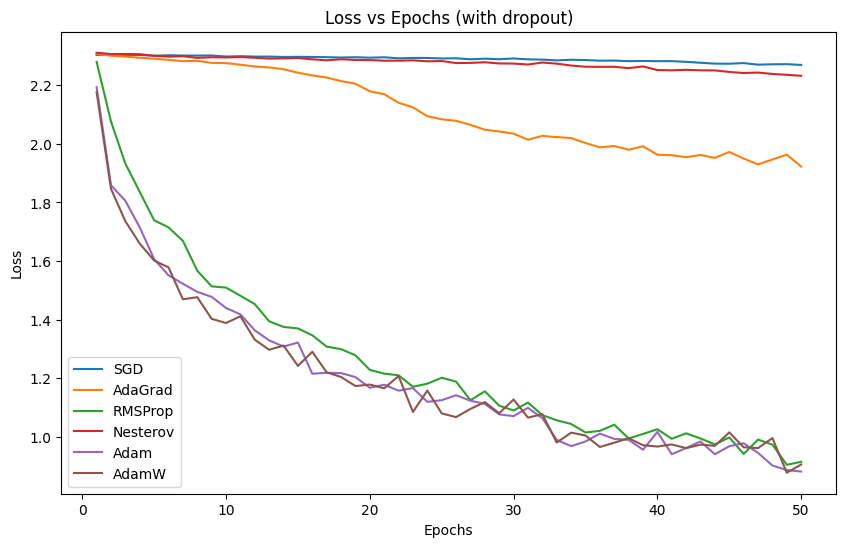

In [7]:
# Run training for all optimizers (with dropout)
plt.figure(figsize=(10, 6))
plt.title('Loss vs Epochs (with dropout)')
for opt_name in optimizers_dict.keys():
    loss_history = train_and_evaluate(opt_name, dropout=True)
    plt.plot(range(1, n_epochs + 1), loss_history, label=opt_name)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()